# Actividad 2

Ir a la página web del Banco de la República de Colombia y descargar los datos históricos de la tasa de desempleo mensual desde 2000 hasta 2024.


Utilizar Python o R para graficar la serie de tiempo de la tasa de desempleo.


Aplicar una media móvil de 12 meses para suavizar la serie y estimar la tendencia.


Descomponer la serie utilizando el método STL y analizar los componentes de tendencia, estacionalidad y residuos.


Discutir las implicaciones de los patrones observados en la tasa de desempleo para la economía colombiana.

---

Data encontrada: https://uba.banrep.gov.co/htmlcommons/SeriesHistoricas/mercado-laboral.html 

---

In [29]:
import pandas as pd
databanrep = pd.read_excel("databanrep.xlsx", sheet_name="Series de datos", skiprows=2)
databanrep

,Unnamed: 0,Tasa Global de participación - 13 áreas,Tasa Global de participación - Total Nacional,Tasa de desempleo - 13 áreas,Tasa de desempleo - Total Nacional,Tasa de ocupación - 13 áreas,Tasa de ocupación - Total Nacional
0,2001-01-31 00:00:00,70.0177,69.053538,20.7176,16.622326,55.5117,57.575237
1,2001-02-28 00:00:00,70.2342,68.948903,19.5518,17.434206,56.5021,56.928209
2,2001-03-31 00:00:00,69.1487,68.387911,19.1240,15.811933,55.9247,57.574460
3,2001-04-30 00:00:00,67.7233,65.224009,17.5699,14.515078,55.8244,55.756693
4,2001-05-31 00:00:00,68.0567,65.406094,17.7675,14.035833,55.9647,56.225804
...,...,...,...,...,...,...,...
296,2025-09-30 00:00:00,66.3800,63.880000,8.1400,8.170000,60.9800,58.660000
297,2025-10-31 00:00:00,67.6600,65.010000,8.0300,8.200000,62.2300,59.680000
298,2025-11-30 00:00:00,67.3500,64.720000,7.2700,7.020000,62.4600,60.170000
299,2025-12-31 00:00:00,66.7400,64.320000,7.7900,7.980000,61.5400,59.190000


In [30]:
databanrep.columns = ['date', 'tgp_13', 'tgp_nac', 'td_13', 'desempleo_nac', 'to_13', 'to_nac']
databanrep = databanrep[["date", "desempleo_nac"]]
databanrep['date'] = pd.to_datetime(databanrep['date'], errors='coerce')
databanrep = databanrep.dropna(subset=['date'])
databanrep.set_index('date', inplace=True)
databanrep = databanrep.asfreq('ME')

databanrep

,desempleo_nac
date,
2001-01-31,16.622326
2001-02-28,17.434206
2001-03-31,15.811933
2001-04-30,14.515078
2001-05-31,14.035833
...,...
2025-08-31,8.600000
2025-09-30,8.170000
2025-10-31,8.200000


## Serie de tiempo Original

Veamos la Serie de tiempo del Desempleo Nacional

<Figure size 1000x1500 with 0 Axes>

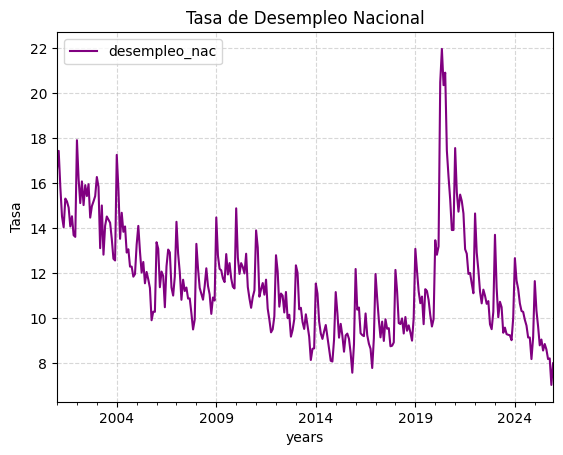

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,15))
databanrep.plot(color="purple")
plt.xlabel("years")
plt.ylabel("Tasa")
plt.title("Tasa de Desempleo Nacional")
plt.grid(True,linestyle="--",alpha=0.5)
plt.legend()
plt.show()

## Media Movil (12 Meses)

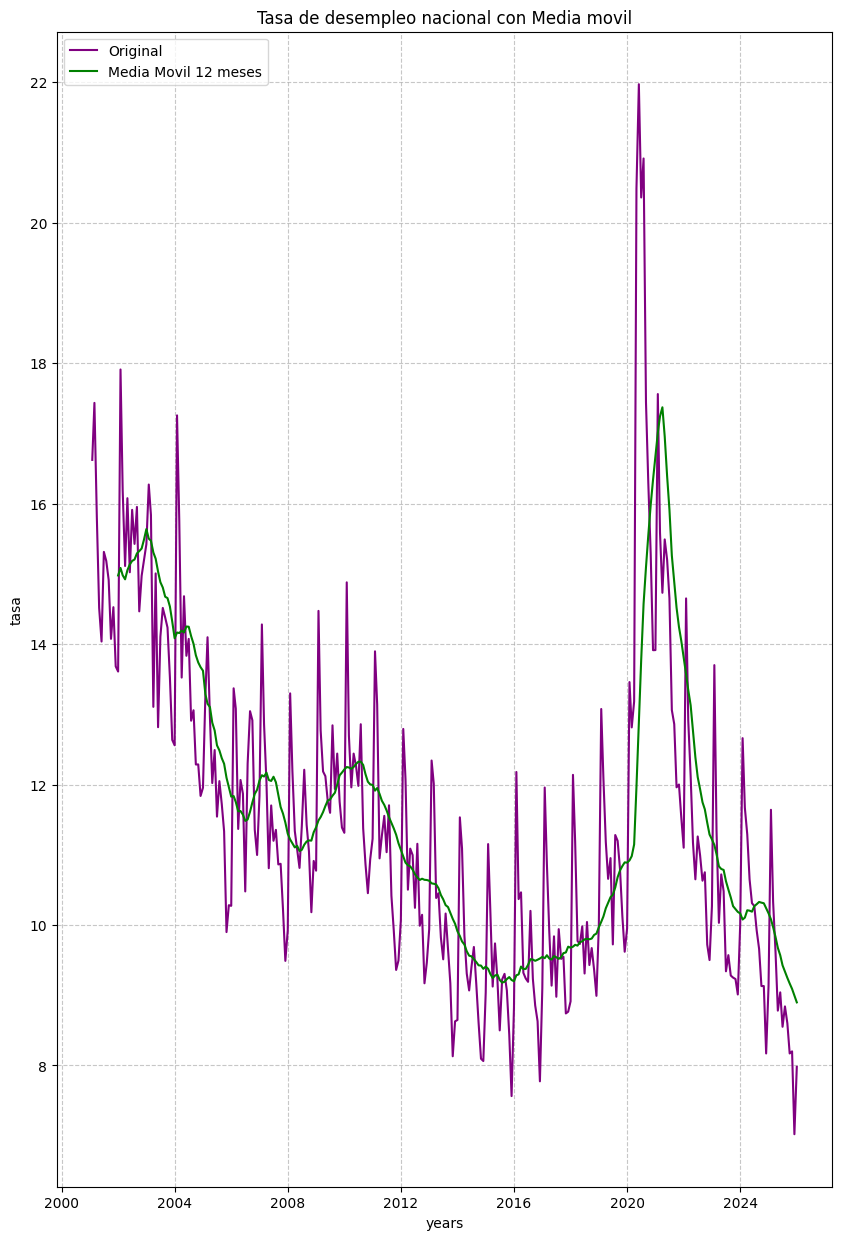

In [40]:
banrep_k12 = databanrep.rolling(window=12).mean()

plt.figure(figsize=(10,15))
plt.plot(databanrep.index, databanrep, label="Original",color="purple")
plt.plot(banrep_k12.index, banrep_k12, label="Media Movil 12 meses",color="green")
plt.grid(True, linestyle="--",alpha=0.7)
plt.legend()
plt.xlabel("years")
plt.ylabel("tasa")
plt.title("Tasa de desempleo nacional con Media movil")
plt.show()

## STL

In [43]:
from statsmodels.tsa.seasonal import STL

result = STL(databanrep, period=12).fit()
data = {
    "Original":databanrep,
    "Tendencia":result.trend,
    "Estacionalidad":result.seasonal,
    "Residuo":result.resid
}

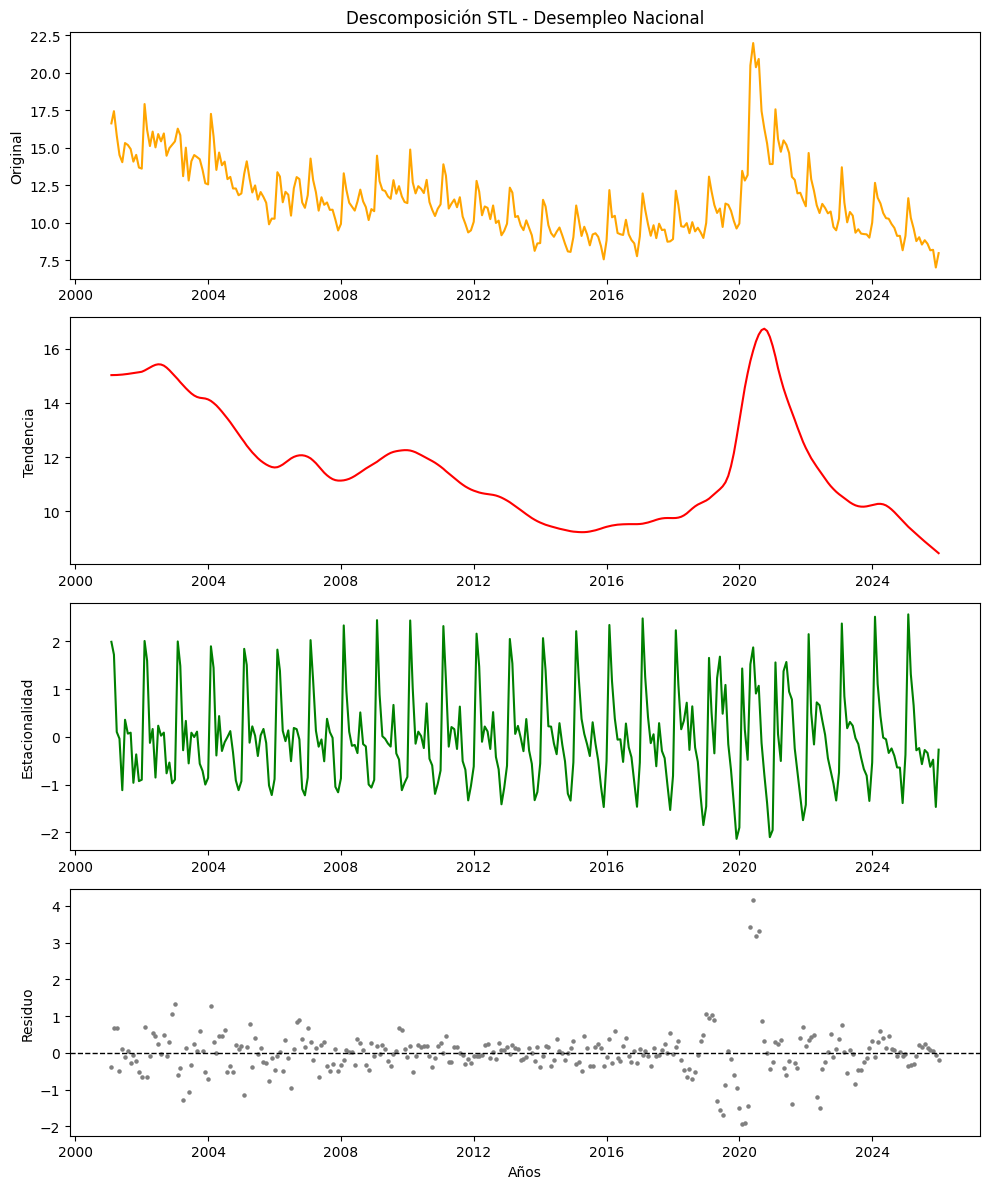

In [45]:
fig, axes = plt.subplots(4,1,figsize=(10, 12))

# Componente Original
axes[0].plot(databanrep.index, databanrep['desempleo_nac'], color='orange')
axes[0].set_ylabel('Original')
axes[0].set_title('Descomposición STL - Desempleo Nacional')

# Tendencia (Trend)
axes[1].plot(result.trend.index, result.trend, color='red')
axes[1].set_ylabel('Tendencia')

# Estacionalidad (Seasonal)
axes[2].plot(result.seasonal.index, result.seasonal, color='green')
axes[2].set_ylabel('Estacionalidad')

# Residuo (Residual/Noise)
axes[3].scatter(result.resid.index, result.resid, color='gray', s=5)
axes[3].axhline(0, color='black', linestyle='--', linewidth=1)
axes[3].set_ylabel('Residuo')

# 3. Ajustes finales
plt.xlabel('Años')
plt.tight_layout()
plt.show()

En cuanto a la **Tendencia y Residuo** vemos que es imposible ignorar la gran alza que hubo en el 2020 donde como ya sabemos fue temporada de Pandemia, ademas vemos que el desempleo venia bajando desde el 2002, pero la pandemia rompió todo eso, ademas  de que el residuo nos muestra que justo para estas epocas del 2020 el desempleo era muy volatil

Hay una **MUY FUERTE ESTACIONALIDAD MARCADA** ya que se ve un patron claro que se repite casi que igualito cada año que pasa, es anual. En enero vemos ese gran crecimiento de la tasa de desempleo debido a la terminacion de contratos y ademas al cierre del año por el contrario vemos que baja mucho ya que es epoca de aumento del consumo y el empleo temporal comercial

La unica buena cuestion de todo esto, es que la Tendencia alcista del desempleo muestra que poco a poco esta tendencia esta bajando tanto que hemos bajado mucho la tasa